In [6]:
# Libraries for static plots and table

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd
import csv
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

In [7]:
# Libraries for interactive utilities

from IPython.display import display, clear_output
import ipywidgets as widgets 
from ipywidgets import interact, Layout, interactive, fixed, interact_manual, IntSlider

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

In [8]:
# Take the csv files with our results
df_eng = pd.read_csv('Dominant_Topics_ENG_2.csv')
# First step -- rename columns
df_eng.rename(columns={ df_eng.columns[0]: "Articles" }, inplace = True)
df_eng.rename(columns={ df_eng.columns[1]: "Topic_0" }, inplace = True)
df_eng.rename(columns={ df_eng.columns[2]: "Topic_1" }, inplace = True)
df_eng.rename(columns={ df_eng.columns[3]: "Topic_2" }, inplace = True)
df_eng.rename(columns={ df_eng.columns[4]: "Topic_3" }, inplace = True)
df_eng.rename(columns={ df_eng.columns[5]: "Topic_4" }, inplace = True)
# Second step -- drop the column of the dominant topics
df_eng.drop('Dominant_Topic_NMF', axis=1, inplace=True)
# Third step -- create separate columns for title of newspapers and year of publication
df_eng['Year'] = df_eng['Articles']
df_eng['Newspaper'] = df_eng['Articles']
# Fourth step -- set years of publication as int variables
df_eng['Year']= df_eng['Year'].map(lambda x: str(x)[0:4])
df_eng['Year'].astype(int)
# Fifth step -- shorten the newspapers' names in the newspaper column
df_eng['Newspaper']= df_eng['Newspaper'].map(lambda x: str(x)[11:14])
# Sixth step -- sort years 
df_eng2 = df_eng.sort_values(by='Year',ascending=True)
# Display our reworked table
df_eng2.head()

,Articles,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Year,Newspaper
0,2002-03-1-MajAustr-1-67-61.txt,0.734406,0.031050,0.052941,0.121928,0.059674,2002,ajA
76,2003-07-01-NYTimes-1-7-4.txt,0.759704,0.001919,0.067554,0.170823,0.000000,2003,NYT
75,2004-03-15-MajAustr-1-67-30.txt,0.749237,0.000306,0.125060,0.091593,0.033804,2004,Maj
74,2004-10-11-TorontoS-1-5-3.txt,0.652717,0.105692,0.149433,0.092158,0.000000,2004,Tor
73,2004-12-22-Independent-1-9-5.txt,0.344901,0.118249,0.104265,0.128737,0.303847,2004,Ind


## Our dataset 

In [6]:
# Widget to filter table by topic value

@interact
def show_articles(column=['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4'], value=(0, 1, 0.05)):
    return df_eng.loc[df_eng[column] > value]

,Articles,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Year,Newspaper
0,2002-03-1-MajAustr-1-67-61.txt,0.734406,0.031050,0.052941,0.121928,0.059674,2002,ajA
1,2018-01-24-MajAustr-1-67-2.txt,0.627873,0.004257,0.183715,0.125618,0.058536,2018,Maj
2,2017-11-22-Independent-1-9-4.txt,0.944391,0.000000,0.000000,0.055609,0.000000,2017,Ind
3,2017-09-27-Times-1-9-4.txt,0.874172,0.000000,0.125828,0.000000,0.000000,2017,Tim
4,2016-08-7-MajAustr-1-67-26.txt,0.374457,0.008095,0.232753,0.181643,0.203052,2016,ajA
...,...,...,...,...,...,...,...,...
106,2016-02-18-MajAustr-1-67-1.txt,0.398105,0.038285,0.406461,0.057571,0.099578,2016,Maj
112,2014-09-08-CDaily-1-10-9.txt,0.369046,0.000000,0.156535,0.378469,0.095950,2014,CDa
115,2011-08-2-MajAustr-1-67-60.txt,0.376311,0.000000,0.109846,0.453747,0.060097,2011,ajA
116,2020-08-8-MajAustr-1-67-3.txt,0.277453,0.151180,0.070926,0.165493,0.334948,2020,ajA


## Our plot

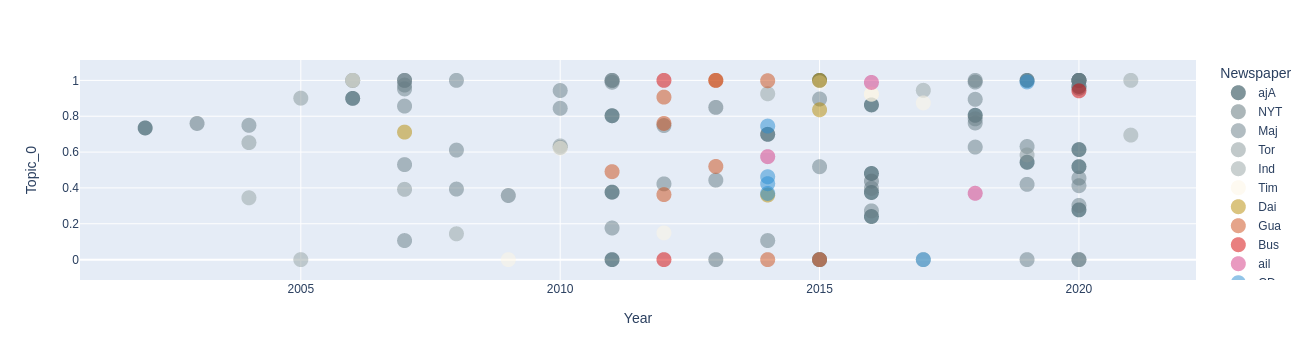

In [6]:
import plotly.express as px
df_eng2["Year"] = df_eng2["Year"].astype(int)
print(df_eng2["Newspaper"].unique())
# Define color discrete map for the newspapers' categories (hex code for colors)
color_discrete_map = {'ajA': '#002b36', 'NYT': '#586e75', 'Maj': '#657b83', 'Tor': '#839496', 'Ind': '#93a1a1', 'Tim': '#fdf6e3', 'Dai': '#b58900', 'Gua': '#cb4b16', 'Bus': '#d30102', 'ail': '#d33682', 'CDa': '#268bd2'}

@interact
# with year only
def scatter_plot(x=list(df_eng2.select_dtypes('number').columns[5:]), 
                 y=list(df_eng2.select_dtypes('number').columns[0:4])):
                #theme=list(cf.themes.THEMES.keys()), 
                 #colorscale=list(cf.colors._scales_names.keys())):

# with all integer categories in 'x' and 'y'
#def scatter_plot(x=list(df_eng2.select_dtypes('number').columns), 
#                 y=list(df_eng2.select_dtypes('number').columns),
#                 theme=list(cf.themes.THEMES.keys()), 
#                 colorscale=list(cf.colors._scales_names.keys())):
    
    
    fig=px.scatter(df_eng2, x=x, y=y, color="Newspaper", 
             opacity=0.5,
             #trendline="rolling",
             #trendline_options=dict(window=2),
             color_discrete_map=color_discrete_map)
    fig.update_traces(marker=dict(size=15))
    fig.show()